## **Business Problem**

This data-driven project aims to derive actionable insights to enhance customer retention by focusing on high-value customers and identifying churn risks. The primary concern is the alarming customer churn rate faced by the company, leading to significant revenue loss. A higher churn rate indicates a critical issue that requires an in-depth analysis to uncover the underlying causes and patterns.

To better understand customer churn in the Telecom Company, a detailed analytical approach will be used.

First, a comprehensive examination of the dataset will shed light on factors such as customer demographics, service tenure, billing patterns, common subscriptions, preferred offers, and additional services demanded. Along with this, data visualization will play a key role. By using various graphs and charts, we can better understand the reasons behind the higher churn rates. These visualizations will meticulously highlight trends within the dataset for different customer segments, helping stakeholders to better understand customer behavior.

Lastly, to ensure that our findings are grounded in solid evidence, we will apply statistical tools, including t-tests and regression analyses, to validate our insights and further explore the factors driving customer churn.

In [2]:
import sys
print(sys.version)

3.12.1 (main, Sep 30 2024, 17:05:21) [GCC 9.4.0]


### **Importing Modules and Loading Data**

In [3]:
# Data Loading and Manipulation modules
import pandas as pd
import numpy as np

# Machine learning and metrics modules.
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Visualisation Modules and Set the 'ggplot' style
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
df=pd.read_csv('Customer Churn.csv') #load data
df.head() # print 5 rows of data

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


Checking Columns in the dataset

In [5]:
df.columns # data columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

Prints the unique values for each categorical column in the given DataFrame.

In [6]:
def print_unique_values(df): # print uniques values of categorical columns
    for col in df:
        # Check if the column's data type is 'object' (categorical)
        if df[col].dtype == 'object':
            # Print the column name and its unique values
            unique_vals = df[col].unique()
            print(f"{col}: {unique_vals}")

In [7]:
print_unique_values(df)

Customer ID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Gender: ['Female' 'Male']
Married: ['Yes' 'No']
City: ['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Jacumba' 'Carpinteria'
 'Meadow Valley']
Offer: [nan 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Phone Service: ['Yes' 'No']
Multiple Lines: ['No' 'Yes' nan]
Internet Service: ['Yes' 'No']
Internet Type: ['Cable' 'Fiber Optic' 'DSL' nan]
Online Security: ['No' 'Yes' nan]
Online Backup: ['Yes' 'No' nan]
Device Protection Plan: ['No' 'Yes' nan]
Premium Tech Support: ['Yes' 'No' nan]
Streaming TV: ['Yes' 'No' nan]
Streaming Movies: ['No' 'Yes' nan]
Streaming Music: ['No' 'Yes' nan]
Unlimited Data: ['Yes' 'No' nan]
Contract: ['One Year' 'Month-to-Month' 'Two Year']
Paperless Billing: ['Yes' 'No']
Payment Method: ['Credit Card' 'Bank Withdrawal' 'Mailed Check']
Customer Status: ['Stayed' 'Churned' 'Joined']
Churn Category: [nan 'Competitor' 'Dissatisfaction' 'Other' 'Price' 'Attitude']
Chur

In [8]:
df.describe() # statistical Summary of the data

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [9]:
df.info() # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

#### **Checking and Visualize Null or Missing Values**

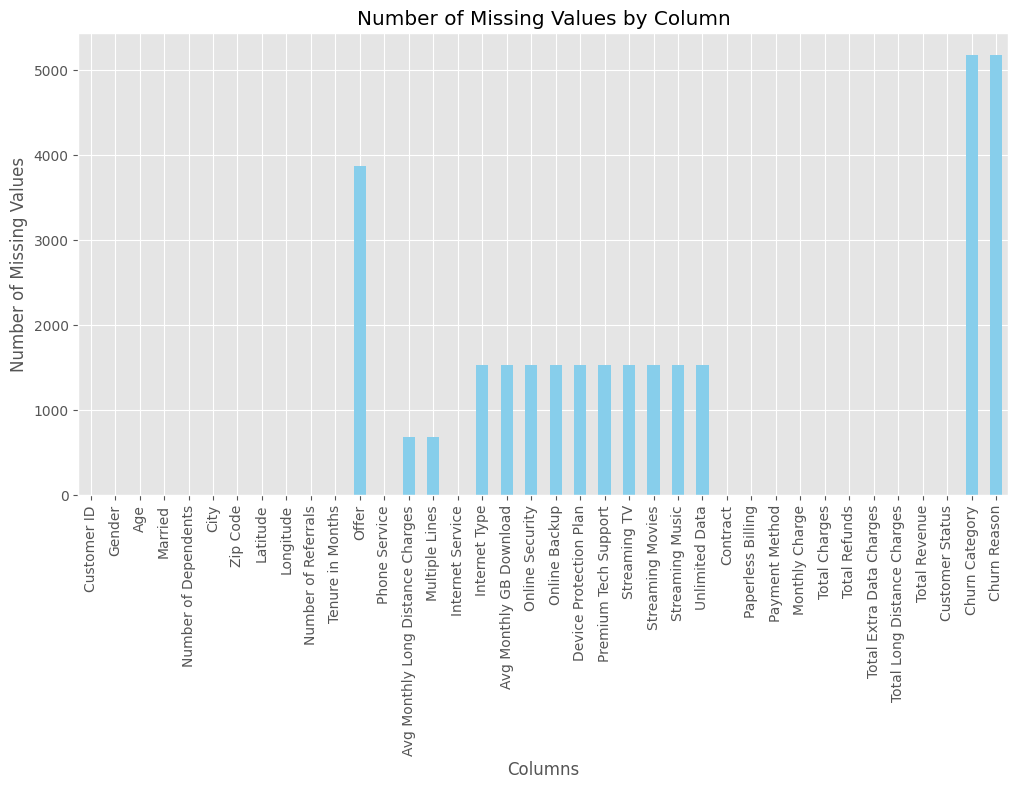

In [10]:
# Count the number of missing values
missing_values_count = df.isnull().sum()

# Create a bar chart to visualize missing values
plt.figure(figsize=(12, 6))
missing_values_count.plot(kind='bar', color='skyblue')
plt.title('Number of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

**Dealing with missing Values**

In [11]:
# Dealing with missing values for specified columns
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].fillna(df['Avg Monthly Long Distance Charges'].mean())
df['Multiple Lines'] = df['Multiple Lines'].fillna('No')
df['Internet Type'] = df['Internet Type'].fillna('None')
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].fillna(df['Avg Monthly GB Download'].mean())
df['Online Security'] = df['Online Security'].fillna('No')
df['Online Backup'] = df['Online Backup'].fillna('No')
df['Device Protection Plan'] = df['Device Protection Plan'].fillna('No')
df['Premium Tech Support'] = df['Premium Tech Support'].fillna('No')
df['Streaming TV'] = df['Streaming TV'].fillna('No')
df['Streaming Movies'] = df['Streaming Movies'].fillna('No')
df['Streaming Music'] = df['Streaming Music'].fillna('No')
df['Unlimited Data'] = df['Unlimited Data'].fillna('No')
df['Churn Category'] = df['Churn Category'].fillna('Other')
# df['Churn Reason'] = df['Churn Reason'].fillna('Other')

### **Checking Duplicate Values**

In [12]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 0


### **Checking for Outliers**
detecting outliers

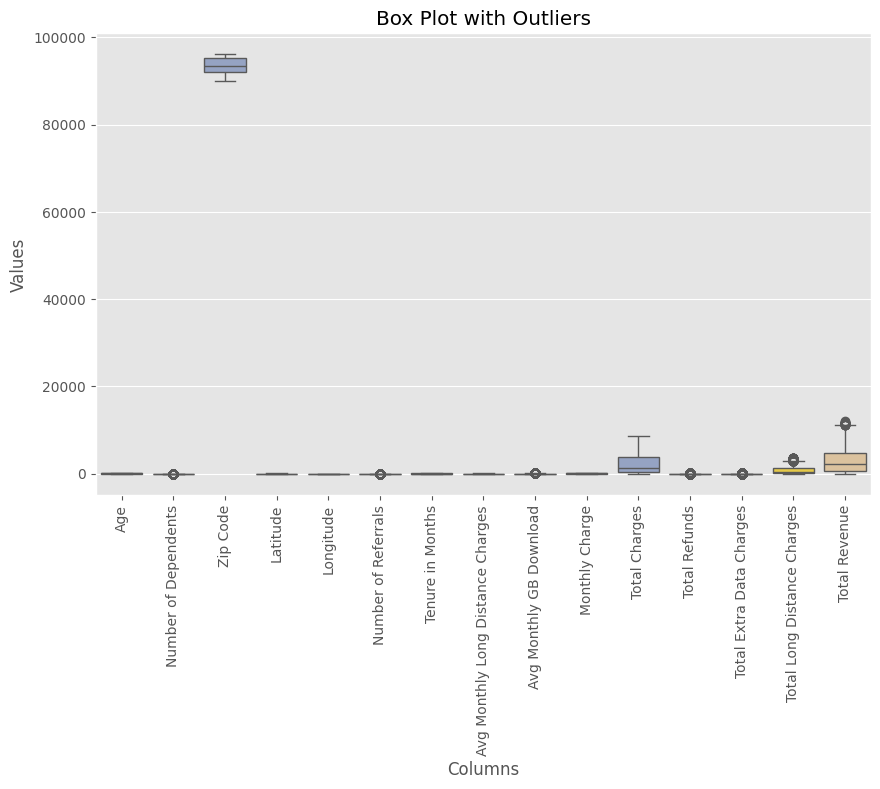

In [13]:
# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette='Set2')
plt.title('Box Plot with Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

##### There are no prominent specific outliers that might ocould affect the overall analysis, so we'll proceed further with the analysis.

## **Visualisations and Analysis**

#### **The Problem**

Total Revenue: 21371131.69
|-------------------------------------|

Total Customers: 7043
|-------------------------------------|

Revenue by Customer Status:


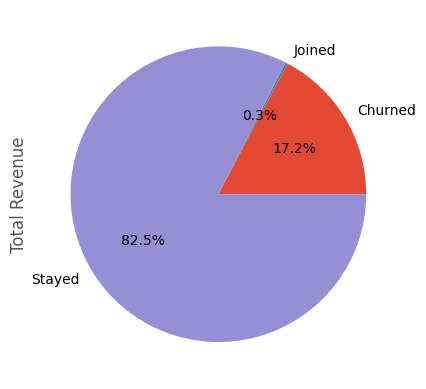

Customer Status
Churned     3684459.82
Joined        54279.75
Stayed     17632392.12
Name: Total Revenue, dtype: float64
|-------------------------------------|

Count by Customer Status:


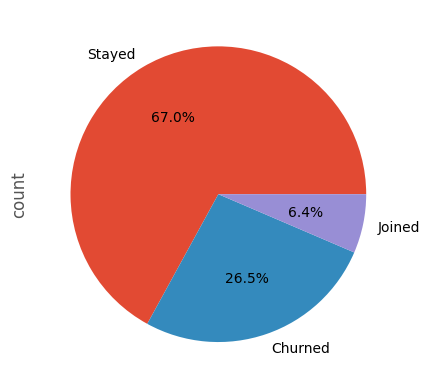

Customer Status
Churned    1869
Joined      454
Stayed     4720
dtype: int64


In [14]:
total_revenue_sum = df['Total Revenue'].sum()
print("Total Revenue:", total_revenue_sum)
print('|-------------------------------------|\n')
customer_status_count = df['Customer Status'].count()

print("Total Customers:", customer_status_count)
print('|-------------------------------------|\n')
print("Revenue by Customer Status:")
revenue_by_status = df.groupby(['Customer Status'])['Total Revenue'].sum()
df.groupby(['Customer Status'])['Total Revenue'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.show()
print(revenue_by_status)
print('|-------------------------------------|\n')
count_by_status = df.groupby(['Customer Status']).size()
print("Count by Customer Status:")
df['Customer Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()
print(count_by_status)

The data highlights concerning financial and customer trends for the company. The company experienced a significant revenue loss of 3.68 million USD, which makes up roughly 17.2% of its entire revenue. This monetary setback is paralleled by a substantial customer churn. The customer churn rate stands at 26.5%, signifying that the company lost 1,869 of its 7,043 customers according to this data.

### **Why Customer Churn?**

<Axes: >

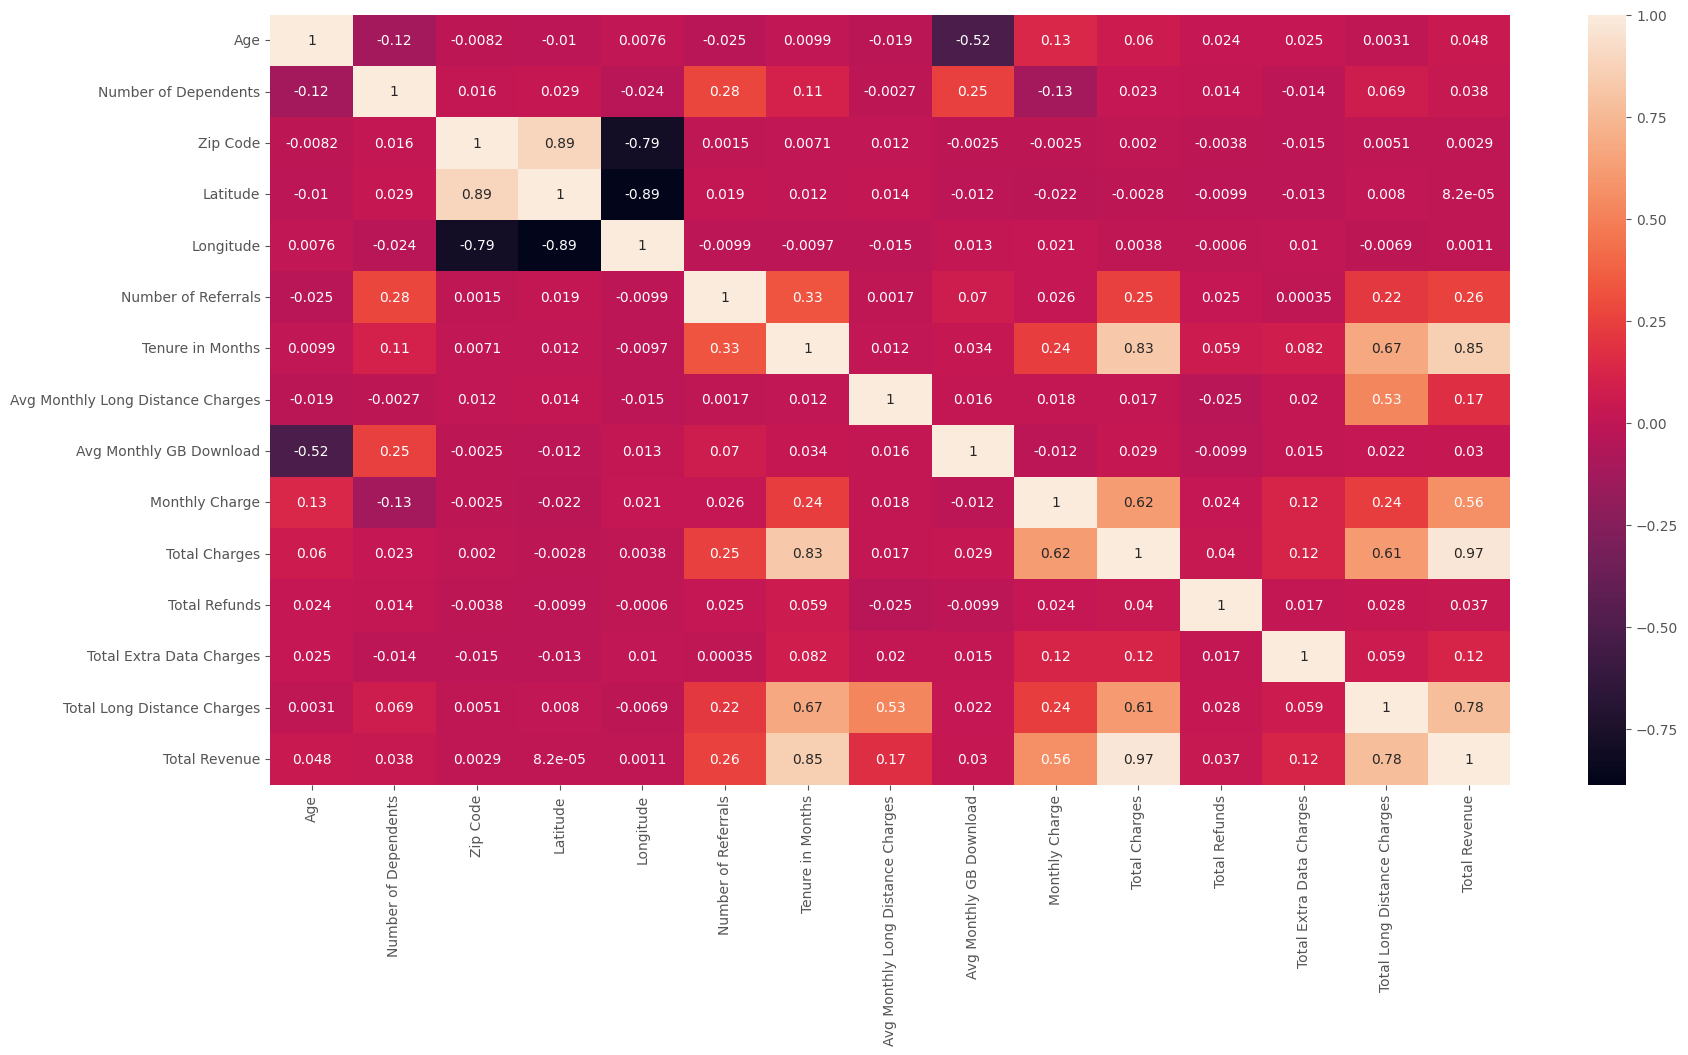

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [16]:
df.groupby('Customer Status')['Monthly Charge'].describe()

,count,mean,std,min,25%,50%,75%,max
Customer Status,,,,,,,,
Churned,1869.0,73.347592,26.373764,-10.0,55.3000,79.500,94.20,118.35
Joined,454.0,42.775991,24.612329,-8.0,20.1625,43.975,64.35,107.95
Stayed,4720.0,61.737415,32.198758,-10.0,25.1000,65.600,89.55,118.75


- `Churned customers` have a `higher mean monthly charge (73.35)` compared to `Joined customers (42.78)` and `Stayed customers (61.74)`. This suggests that customers who churn tend to have higher monthly charges.

In [17]:
df.groupby(['Customer Status','Gender'])['Monthly Charge'].describe()

count       mean        std   min      25%     50%  \
Customer Status Gender                                                        
Churned         Female   939.0  73.606656  26.093400 -10.0  59.6250  79.500   
                Male     930.0  73.086022  26.665339  -9.0  53.8750  79.500   
Joined          Female   211.0  43.374645  23.839314  -8.0  20.2250  44.000   
                Male     243.0  42.256173  25.301925  -8.0  20.1000  43.850   
Stayed          Female  2338.0  62.343926  32.085856 -10.0  25.2500  65.625   
                Male    2382.0  61.142107  32.304853 -10.0  25.0125  65.550   

                           75%     max  
Customer Status Gender                  
Churned         Female  93.625  117.45  
                Male    94.500  118.35  
Joined          Female  69.225   95.85  
                Male    60.800  107.95  
Stayed          Female  89.750  118.75  
                Male    89.375  118.20

- The `mean monthly charges` for both genders within each customer status category are relatively similar.

In [18]:
df.groupby(['Customer Status'])['Tenure in Months'].describe()

,count,mean,std,min,25%,50%,75%,max
Customer Status,,,,,,,,
Churned,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0
Joined,454.0,1.720264,0.818486,1.0,1.0,1.0,2.0,3.0
Stayed,4720.0,41.041525,22.363674,4.0,21.0,42.0,63.0,72.0


- `Churned customers` have an average tenure of approximately `18 months`, with a relatively high standard deviation of 19.53 months. The minimum tenure is 1 month, while the maximum tenure is 72 months.
- `Joined customers `have an average tenure of around `1.72 months`, with a lower standard deviation of 0.82 months. The majority of joined customers have a tenure of 1 month, with a maximum tenure of 3 months.
- `Stayed customers` have a significantly longer average tenure of approximately `41 months`, with a standard deviation of 22.36 months. The minimum tenure is 4 months, while the maximum tenure is 72 months.

<Axes: xlabel='Tenure in Months', ylabel='Monthly Charge'>

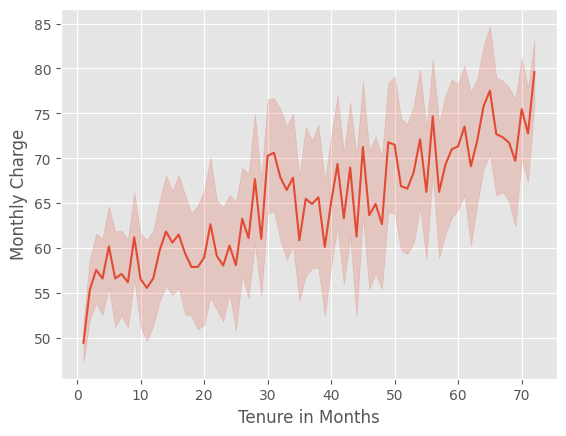

In [19]:
sns.lineplot(x='Tenure in Months',y='Monthly Charge', data=df)

- As the `tenure in months increases`, there is an overall trends for the `monthly charges increasing`.

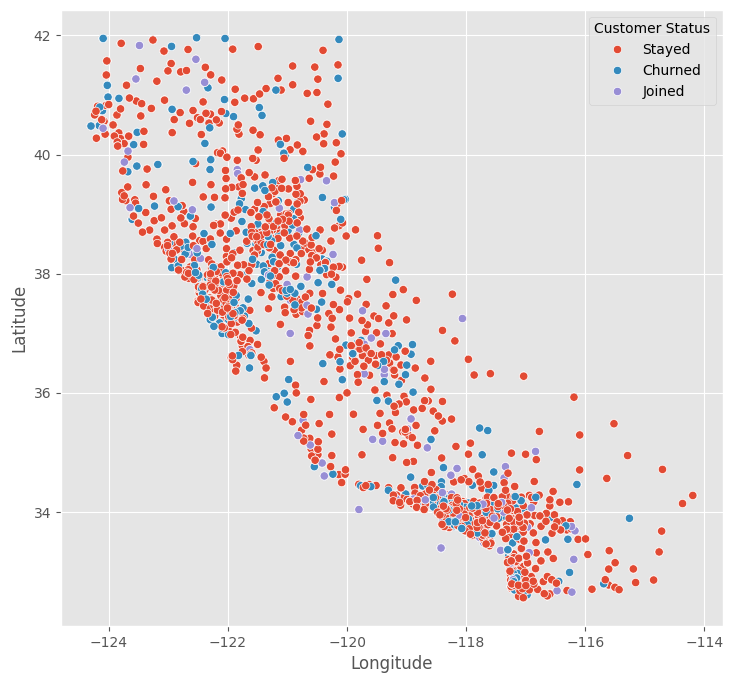

In [20]:
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Customer Status')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(10, 8)
plt.show()

In [21]:
churned = df.loc[df['Customer Status'] != 'Joined']

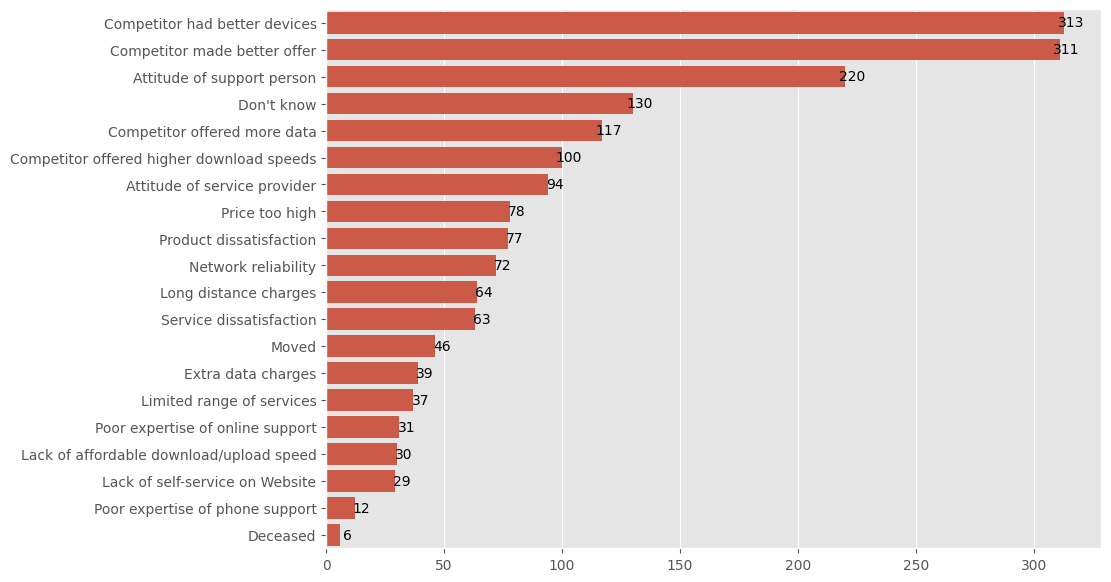

In [22]:
fig = plt.figure(figsize = (10, 7))
ax = sns.countplot(data = churned, y = churned['Churn Reason'], order = churned['Churn Reason'].value_counts().index)
ax.set(xlabel = None, ylabel = None)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

**Insights**

- The most common reason for churn is that a `competitor had better devices`, with a count of 313. This suggests that device quality plays a significant role in customer decision-making.
- The second most prevalent reason is that a `competitor made a better offer`, with a count of 311. This indicates that pricing and promotional incentives from competitors impact customer churn.
- The `attitude of support persons` and `service providers` also contributes to churn, as evidenced by the significant counts of 220 and 94, respectively. This highlights the importance of quality customer service.
- It's interesting to note that a small number of customers churn due to reasons like being deceased or lack of expertise in phone or online support.

This information can be used to identify areas for improvement, such as enhancing device quality, refining pricing strategies, addressing customer service concerns, and focusing on product satisfaction and network reliability. Taking actions based on these insights can help reduce customer churn and enhance overall customer satisfaction and retention.